In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
data

,Date,Adj Close,Volume,IsDividend,DividendAmount,IsSplit,SplitRatio
0,2007-01-25,2.60,905973600.0,False,0.0,False,0.0
1,2007-01-26,2.57,986874000.0,False,0.0,False,0.0
2,2007-01-29,2.59,901664400.0,False,0.0,False,0.0
3,2007-01-30,2.57,577970400.0,False,0.0,False,0.0
4,2007-01-31,2.58,856069200.0,False,0.0,False,0.0
...,...,...,...,...,...,...,...
4546,2025-02-19,244.87,32204200.0,False,0.0,False,0.0
4547,2025-02-20,245.83,32316900.0,False,0.0,False,0.0
4548,2025-02-21,245.55,53197400.0,False,0.0,False,0.0
4549,2025-02-24,247.10,51326400.0,False,0.0,False,0.0


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

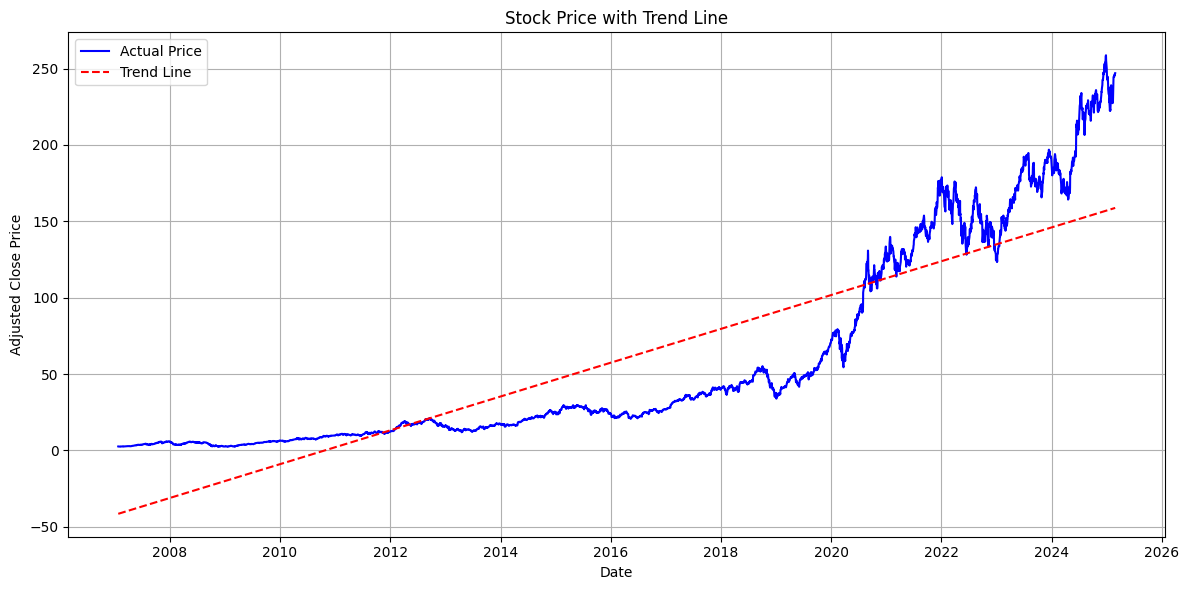

In [13]:
data['Date_Ordinal'] = data['Date'].map(pd.Timestamp.toordinal)
z = np.polyfit(data['Date_Ordinal'], data['Adj Close'], 1)  # Degree 1 = straight line
p = np.poly1d(z)
trend_line = p(data['Date_Ordinal'])
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Adj Close'], label='Actual Price', color='blue')
plt.plot(data['Date'], trend_line, label='Trend Line', color='red', linestyle='--')
plt.title('Stock Price with Trend Line')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


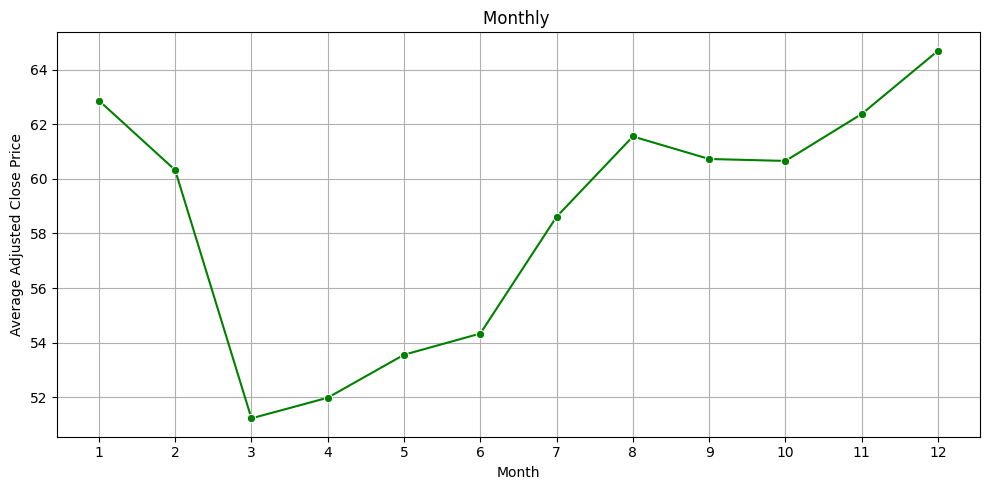

In [15]:
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')['Adj Close'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='Month', y='Adj Close', marker='o', color='green')
plt.title('Monthly ')
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close Price')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

In [16]:
data

,Date,Adj Close,Volume,IsDividend,DividendAmount,IsSplit,SplitRatio,Date_Ordinal,Month
0,2007-01-25,2.60,905973600.0,False,0.0,False,0.0,732701,1
1,2007-01-26,2.57,986874000.0,False,0.0,False,0.0,732702,1
2,2007-01-29,2.59,901664400.0,False,0.0,False,0.0,732705,1
3,2007-01-30,2.57,577970400.0,False,0.0,False,0.0,732706,1
4,2007-01-31,2.58,856069200.0,False,0.0,False,0.0,732707,1
...,...,...,...,...,...,...,...,...,...
4546,2025-02-19,244.87,32204200.0,False,0.0,False,0.0,739301,2
4547,2025-02-20,245.83,32316900.0,False,0.0,False,0.0,739302,2
4548,2025-02-21,245.55,53197400.0,False,0.0,False,0.0,739303,2
4549,2025-02-24,247.10,51326400.0,False,0.0,False,0.0,739306,2


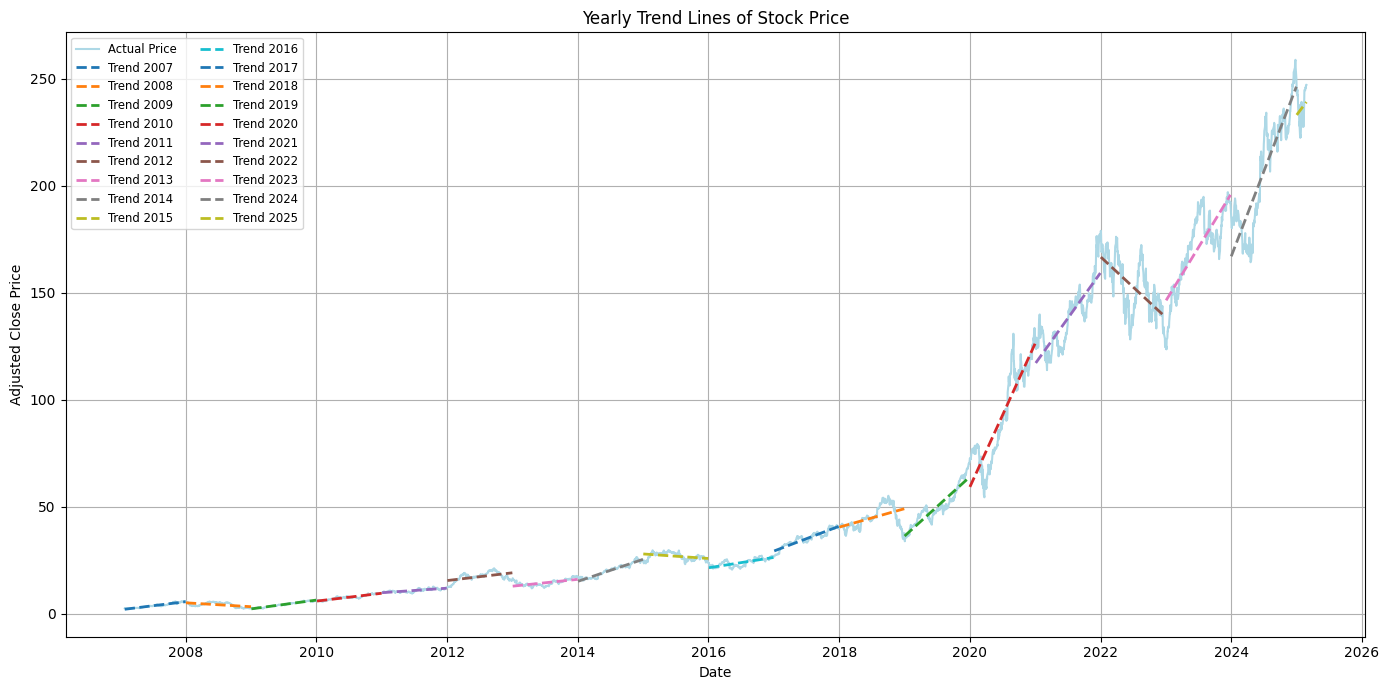

In [22]:
data['Year'] = data['Date'].dt.year
data['YearPeriod'] = data['Date'].dt.to_period('Y')

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Adj Close'],
         color='lightblue', label='Actual Price')
for year, group in data.groupby('Year'):
    if len(group) > 1:
        x_ord = group['Date'].map(pd.Timestamp.toordinal)
        y = group['Adj Close']
        coeffs = np.polyfit(x_ord, y, 1)
        trend_func = np.poly1d(coeffs)
        trend_vals = trend_func(x_ord)
        plt.plot(group['Date'], trend_vals,
                 linestyle='--', linewidth=2,
                 label=f'Trend {year}')
plt.title('Yearly Trend Lines of Stock Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


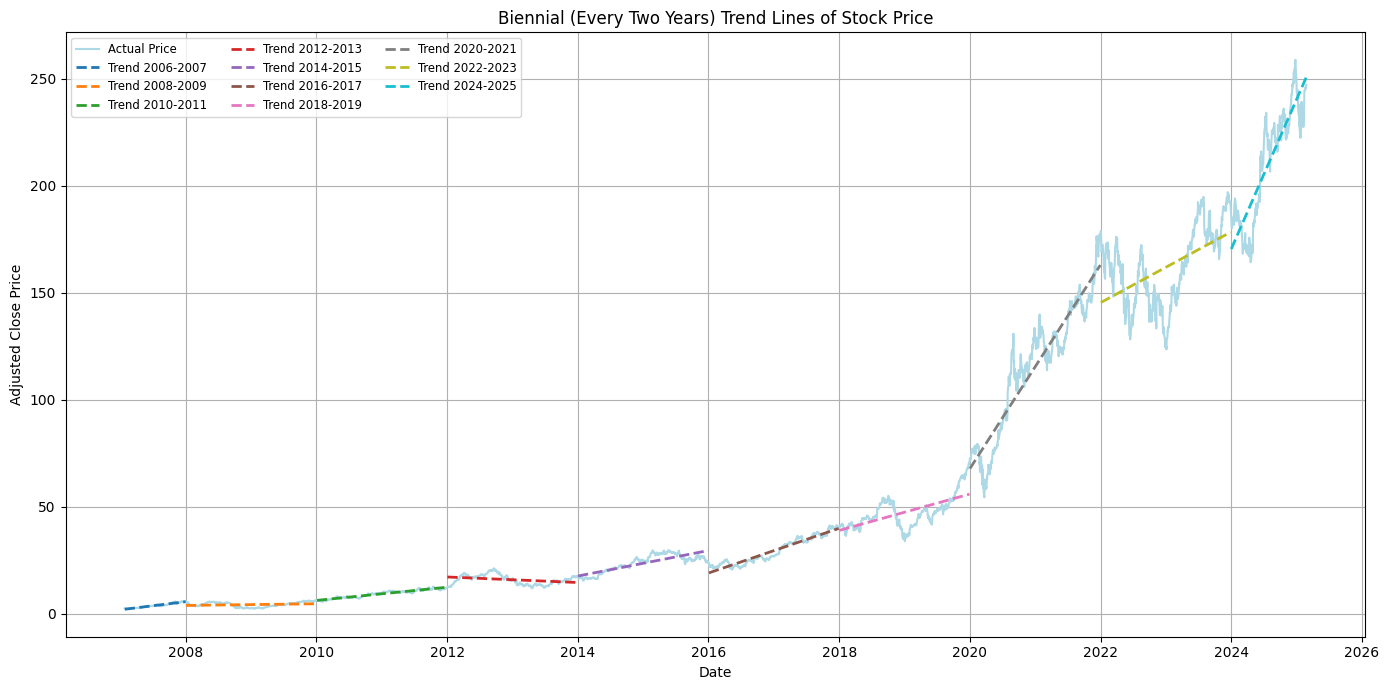

In [23]:

data['BienniumStart'] = (data['Date'].dt.year // 2) * 2
data['BienniumLabel'] = (
    data['BienniumStart'].astype(str) + '-' + (data['BienniumStart'] + 1).astype(str)
)
plt.figure(figsize=(14, 7))
plt.plot(
    data['Date'], data['Adj Close'],
    color='lightblue', label='Actual Price'
)
for label, group in data.groupby('BienniumLabel'):
    if len(group) > 1:
        x_ord = group['Date'].map(pd.Timestamp.toordinal)
        y = group['Adj Close']
        coeffs = np.polyfit(x_ord, y, 1)
        trend = np.poly1d(coeffs)(x_ord)
        plt.plot(
            group['Date'], trend,
            linestyle='--', linewidth=2,
            label=f'Trend {label}'
        )
plt.title('Biennial (Every Two Years) Trend Lines of Stock Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left', fontsize='small', ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
data

,Date,Adj Close,Volume,IsDividend,DividendAmount,IsSplit,SplitRatio,Date_Ordinal,Month,YearMonth,Year,YearPeriod,BienniumStart,BienniumLabel
0,2007-01-25,2.60,905973600.0,False,0.0,False,0.0,732701,1,2007-01,2007,2007,2006,2006-2007
1,2007-01-26,2.57,986874000.0,False,0.0,False,0.0,732702,1,2007-01,2007,2007,2006,2006-2007
2,2007-01-29,2.59,901664400.0,False,0.0,False,0.0,732705,1,2007-01,2007,2007,2006,2006-2007
3,2007-01-30,2.57,577970400.0,False,0.0,False,0.0,732706,1,2007-01,2007,2007,2006,2006-2007
4,2007-01-31,2.58,856069200.0,False,0.0,False,0.0,732707,1,2007-01,2007,2007,2006,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,2025-02-19,244.87,32204200.0,False,0.0,False,0.0,739301,2,2025-02,2025,2025,2024,2024-2025
4547,2025-02-20,245.83,32316900.0,False,0.0,False,0.0,739302,2,2025-02,2025,2025,2024,2024-2025
4548,2025-02-21,245.55,53197400.0,False,0.0,False,0.0,739303,2,2025-02,2025,2025,2024,2024-2025
4549,2025-02-24,247.10,51326400.0,False,0.0,False,0.0,739306,2,2025-02,2025,2025,2024,2024-2025


In [30]:
import pandas as pd
import numpy as np

data['Year_Trend_Value'] = np.nan
for year, group in data.groupby('Year'):
    if len(group) > 1:
        x_ord = group['Date'].map(pd.Timestamp.toordinal)
        y = group['Adj Close']
        coeffs = np.polyfit(x_ord, y, 1)
        trend_func = np.poly1d(coeffs)
        trend_vals = trend_func(x_ord)
        data.loc[group.index, 'Year_Trend_Value'] = trend_vals


In [33]:
data[["Yearly_Trend","Adj Close"]]

,Yearly_Trend,Adj Close
0,2.176030,2.60
1,2.186392,2.57
2,2.217478,2.59
3,2.227840,2.57
4,2.238202,2.58
...,...,...
4546,238.350831,244.87
4547,238.462185,245.83
4548,238.573539,245.55
4549,238.907600,247.10


In [28]:
data

,Date,Adj Close,Volume,IsDividend,DividendAmount,IsSplit,SplitRatio,Date_Ordinal,Month,YearMonth,Year,YearPeriod,BienniumStart,BienniumLabel,Yearly_Trend
0,2007-01-25,2.60,905973600.0,False,0.0,False,0.0,732701,1,2007-01,2007,2007,2006,2006-2007,2.176030
1,2007-01-26,2.57,986874000.0,False,0.0,False,0.0,732702,1,2007-01,2007,2007,2006,2006-2007,2.186392
2,2007-01-29,2.59,901664400.0,False,0.0,False,0.0,732705,1,2007-01,2007,2007,2006,2006-2007,2.217478
3,2007-01-30,2.57,577970400.0,False,0.0,False,0.0,732706,1,2007-01,2007,2007,2006,2006-2007,2.227840
4,2007-01-31,2.58,856069200.0,False,0.0,False,0.0,732707,1,2007-01,2007,2007,2006,2006-2007,2.238202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,2025-02-19,244.87,32204200.0,False,0.0,False,0.0,739301,2,2025-02,2025,2025,2024,2024-2025,238.350831
4547,2025-02-20,245.83,32316900.0,False,0.0,False,0.0,739302,2,2025-02,2025,2025,2024,2024-2025,238.462185
4548,2025-02-21,245.55,53197400.0,False,0.0,False,0.0,739303,2,2025-02,2025,2025,2024,2024-2025,238.573539
4549,2025-02-24,247.10,51326400.0,False,0.0,False,0.0,739306,2,2025-02,2025,2025,2024,2024-2025,238.907600


In [37]:
data.columns

Index(['Date', 'Adj Close', 'Volume', 'IsDividend', 'DividendAmount',
       'IsSplit', 'SplitRatio', 'Date_Ordinal', 'Month', 'YearMonth', 'Year',
       'YearPeriod', 'BienniumStart', 'BienniumLabel', 'Yearly_Trend',
       'Year_Trend_Value'],
      dtype='object')

In [39]:
data = data.drop(['Year', 'YearPeriod', 'Month',"Date_Ordinal","BienniumLabel","BienniumStart"],axis=1)


In [41]:
data = data.drop(['YearMonth', 'Yearly_Trend'],axis=1)


In [42]:
data.columns

Index(['Date', 'Adj Close', 'Volume', 'IsDividend', 'DividendAmount',
       'IsSplit', 'SplitRatio', 'Year_Trend_Value'],
      dtype='object')

In [43]:
data

,Date,Adj Close,Volume,IsDividend,DividendAmount,IsSplit,SplitRatio,Year_Trend_Value
0,2007-01-25,2.60,905973600.0,False,0.0,False,0.0,2.176030
1,2007-01-26,2.57,986874000.0,False,0.0,False,0.0,2.186392
2,2007-01-29,2.59,901664400.0,False,0.0,False,0.0,2.217478
3,2007-01-30,2.57,577970400.0,False,0.0,False,0.0,2.227840
4,2007-01-31,2.58,856069200.0,False,0.0,False,0.0,2.238202
...,...,...,...,...,...,...,...,...
4546,2025-02-19,244.87,32204200.0,False,0.0,False,0.0,238.350831
4547,2025-02-20,245.83,32316900.0,False,0.0,False,0.0,238.462185
4548,2025-02-21,245.55,53197400.0,False,0.0,False,0.0,238.573539
4549,2025-02-24,247.10,51326400.0,False,0.0,False,0.0,238.907600


In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

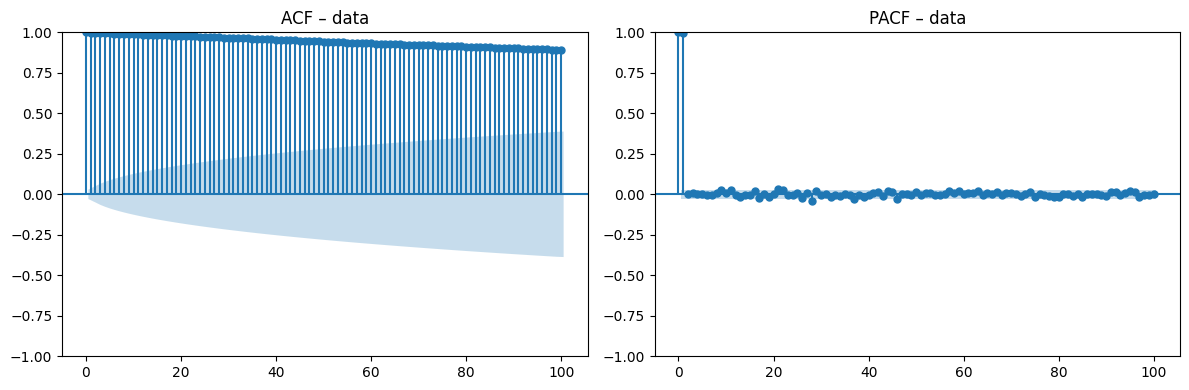

In [47]:
a="Adj Close"
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data[a], lags=100, ax=ax[0])
plot_pacf(data[a], lags=100, ax=ax[1])
ax[0].set_title('ACF – data')
ax[1].set_title('PACF – data')
plt.tight_layout()
plt.show()

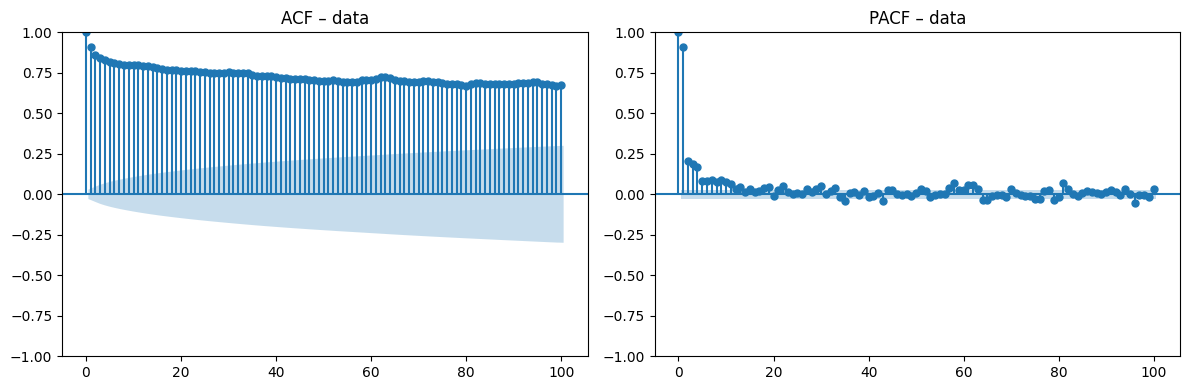

In [48]:
a="Volume"
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data[a], lags=100, ax=ax[0])
plot_pacf(data[a], lags=100, ax=ax[1])
ax[0].set_title('ACF – data')
ax[1].set_title('PACF – data')
plt.tight_layout()
plt.show()

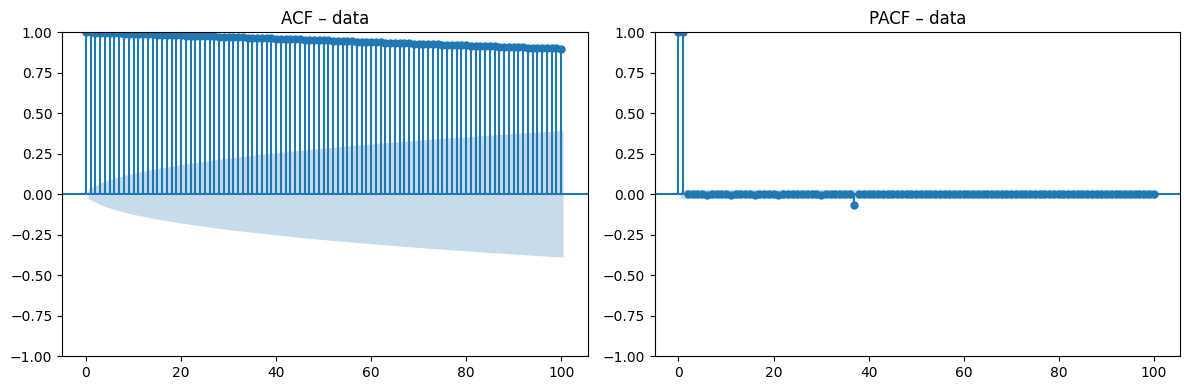

In [49]:
a="Year_Trend_Value"
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data[a], lags=100, ax=ax[0])
plot_pacf(data[a], lags=100, ax=ax[1])
ax[0].set_title('ACF – data')
ax[1].set_title('PACF – data')
plt.tight_layout()
plt.show()

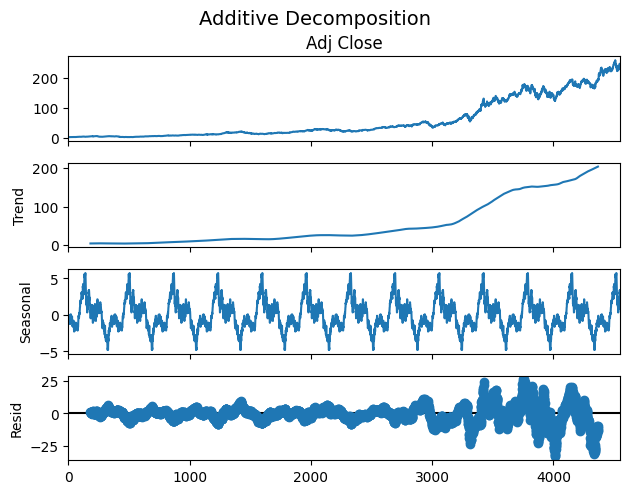

In [50]:
additive = seasonal_decompose(data['Adj Close'], model='additive', period=365)
additive.plot()
plt.suptitle('Additive Decomposition', y=1.02, fontsize=14)
plt.show()

In [51]:
data

,Date,Adj Close,Volume,IsDividend,DividendAmount,IsSplit,SplitRatio,Year_Trend_Value
0,2007-01-25,2.60,905973600.0,False,0.0,False,0.0,2.176030
1,2007-01-26,2.57,986874000.0,False,0.0,False,0.0,2.186392
2,2007-01-29,2.59,901664400.0,False,0.0,False,0.0,2.217478
3,2007-01-30,2.57,577970400.0,False,0.0,False,0.0,2.227840
4,2007-01-31,2.58,856069200.0,False,0.0,False,0.0,2.238202
...,...,...,...,...,...,...,...,...
4546,2025-02-19,244.87,32204200.0,False,0.0,False,0.0,238.350831
4547,2025-02-20,245.83,32316900.0,False,0.0,False,0.0,238.462185
4548,2025-02-21,245.55,53197400.0,False,0.0,False,0.0,238.573539
4549,2025-02-24,247.10,51326400.0,False,0.0,False,0.0,238.907600


In [52]:
from prophet import Prophet

df = data[['Date', 'Adj Close']].rename(columns={'Date': 'ds', 'Adj Close': 'y'})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4xg7iyu/7ebk9gc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4xg7iyu/ve0idmyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69542', 'data', 'file=/tmp/tmpv4xg7iyu/7ebk9gc1.json', 'init=/tmp/tmpv4xg7iyu/ve0idmyb.json', 'output', 'file=/tmp/tmpv4xg7iyu/prophet_modelkl_g39um/prophet_model-20250618102233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-25,3.806065,-6.304959,14.589588,3.806065,3.806065,-0.100787,-0.100787,-0.100787,0.187472,0.187472,0.187472,-0.288260,-0.288260,-0.288260,0.0,0.0,0.0,3.705278
1,2007-01-26,3.806294,-6.577710,14.573652,3.806294,3.806294,-0.033824,-0.033824,-0.033824,0.180852,0.180852,0.180852,-0.214676,-0.214676,-0.214676,0.0,0.0,0.0,3.772470
2,2007-01-29,3.806980,-6.218106,14.911695,3.806980,3.806980,0.438428,0.438428,0.438428,0.370212,0.370212,0.370212,0.068216,0.068216,0.068216,0.0,0.0,0.0,4.245408
3,2007-01-30,3.807208,-6.110101,14.655866,3.807208,3.807208,0.468652,0.468652,0.468652,0.291296,0.291296,0.291296,0.177356,0.177356,0.177356,0.0,0.0,0.0,4.275860
4,2007-01-31,3.807437,-6.412690,14.718378,3.807437,3.807437,0.477749,0.477749,0.477749,0.187289,0.187289,0.187289,0.290460,0.290460,0.290460,0.0,0.0,0.0,4.285186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2025-03-23,221.298869,207.804994,227.820899,221.298869,221.298869,-3.209273,-3.209273,-3.209273,-0.608560,-0.608560,-0.608560,-2.600712,-2.600712,-2.600712,0.0,0.0,0.0,218.089596
4577,2025-03-24,221.365231,208.125052,229.705937,221.365231,221.365231,-2.128300,-2.128300,-2.128300,0.370212,0.370212,0.370212,-2.498513,-2.498513,-2.498513,0.0,0.0,0.0,219.236930
4578,2025-03-25,221.431593,208.854106,229.642248,221.431593,221.431593,-2.110351,-2.110351,-2.110351,0.291296,0.291296,0.291296,-2.401647,-2.401647,-2.401647,0.0,0.0,0.0,219.321242
4579,2025-03-26,221.497955,208.577386,230.058010,221.497955,221.497955,-2.124558,-2.124558,-2.124558,0.187289,0.187289,0.187289,-2.311847,-2.311847,-2.311847,0.0,0.0,0.0,219.373396


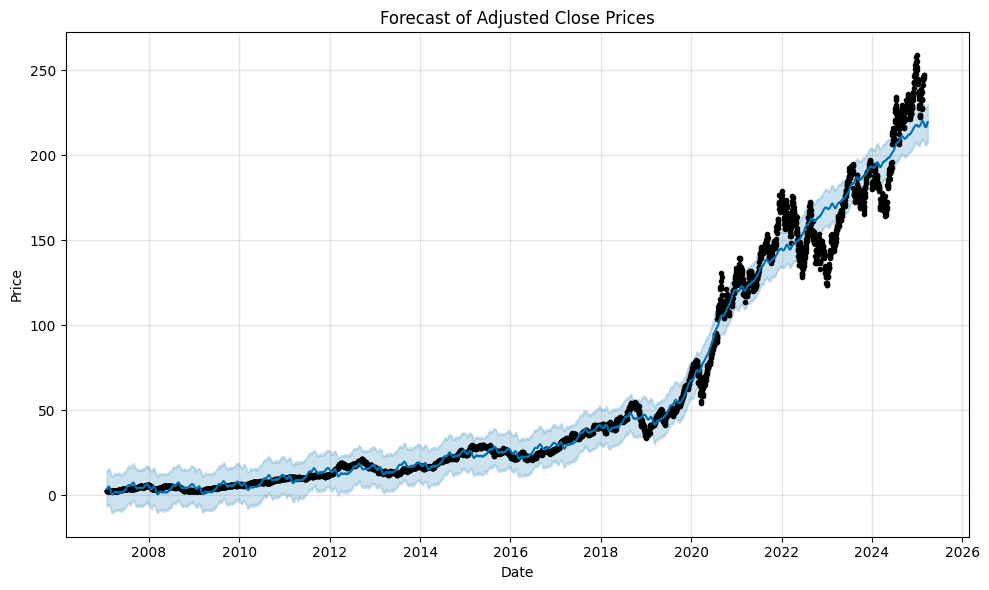

In [54]:
import matplotlib.pyplot as plt


fig = model.plot(forecast)
plt.title('Forecast of Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


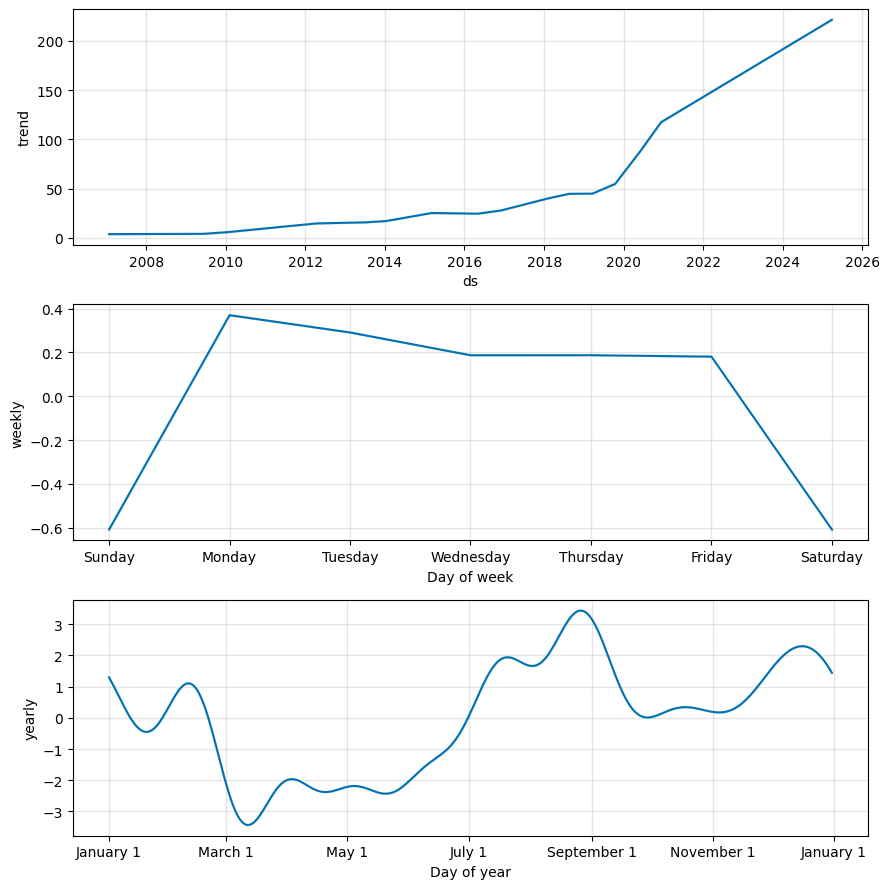

In [55]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()